<h1>Análisis Exploratorio de Datos</h1>

Analizaremos el conjunto de datos de test de forma gráfica.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [2]:
train_df = pd.read_csv('../data/test2.txt', sep="|")

In [3]:
# Ordenamos por usuario y fecha
train_df.sort_values(["ID_Customer","Cod_Fecha"], inplace=True, ascending=True)

In [5]:
print('Número de productos vendidos en total: {}'.format(train_df.Cod_Prod.count()))

Número de productos vendidos en total: 1147687


<h4>Analicemos la frecuencia con la que se vende cada uno de los productos:<h4>

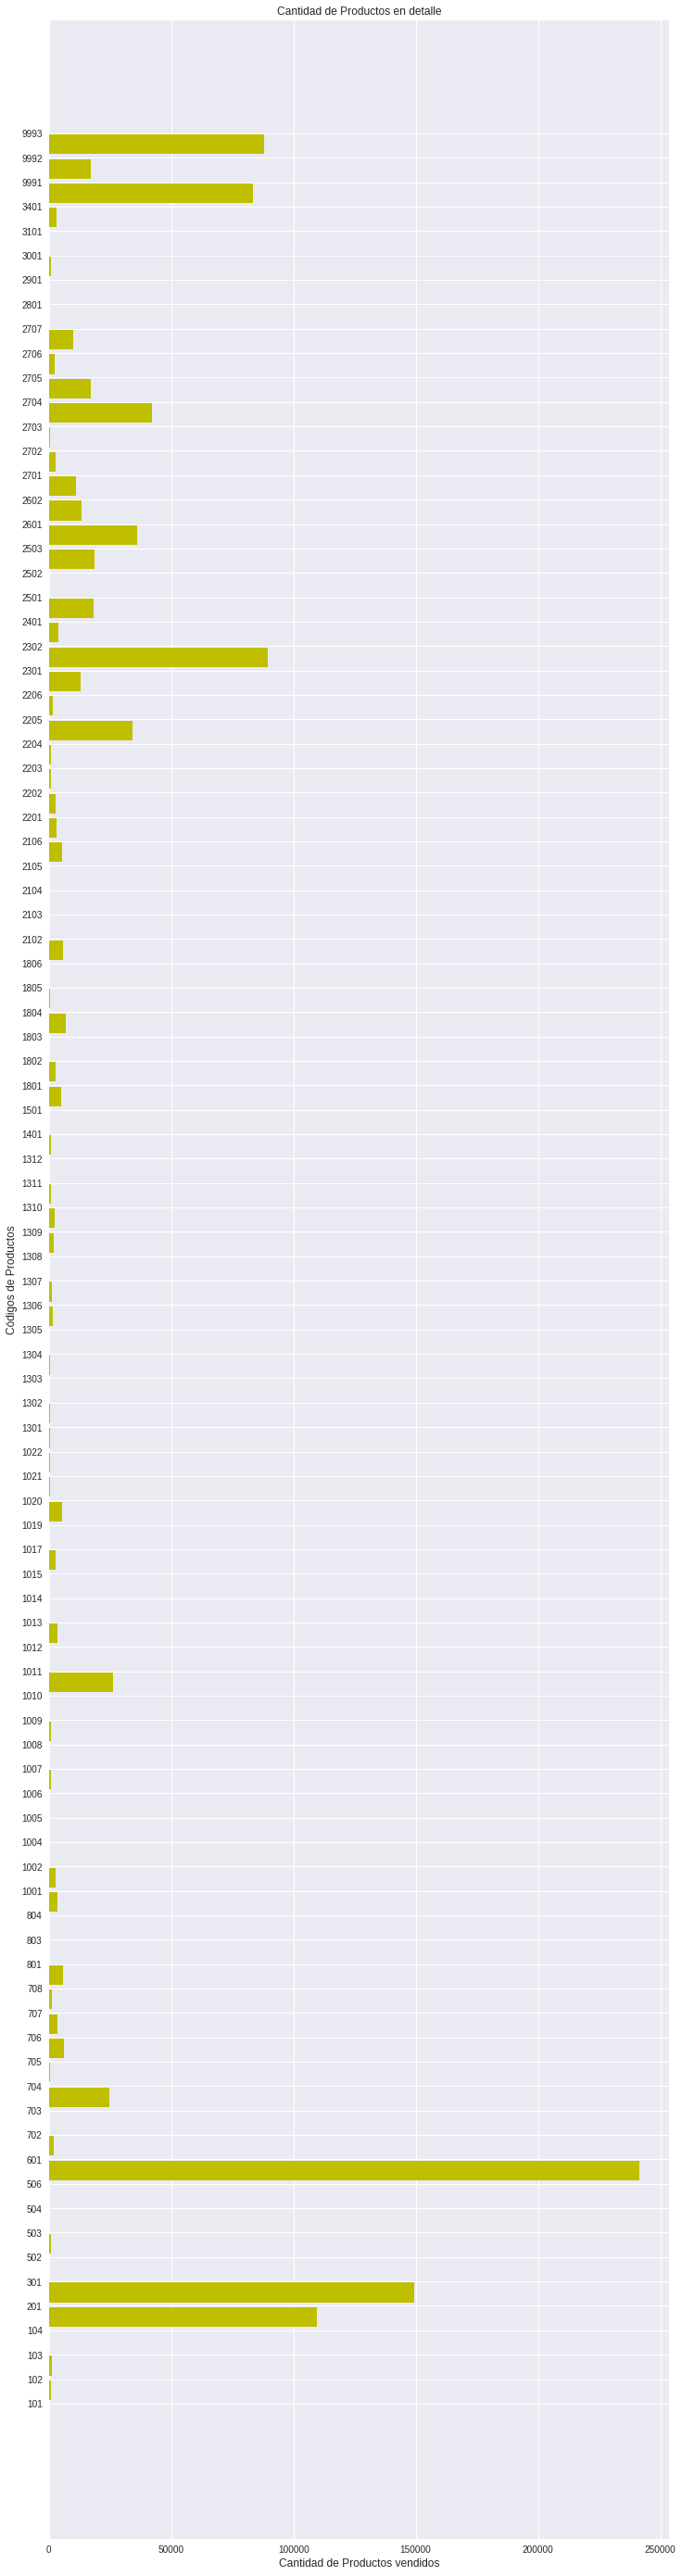

In [6]:
labels = np.sort(train_df.Cod_Prod.unique())
values = train_df.groupby('Cod_Prod').size()
width = 0.9
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Cantidad de Productos vendidos", fontsize=12)
ax.set_ylabel(u"Códigos de Productos", fontsize=12)
ax.set_title("Cantidad de Productos en detalle", fontsize=12)
plt.show()

Como podemos ver hay grandes diferencias en la frecuencia de venta de según qué productos.
Si nos fijamos hay unos pocos productos que son masivamente vendidos: 601, 301, 201, 9991, 2302 y 9993

In [7]:
print(values[601])
print(values[301])
print(values[201])
print(values[9991])
print(values[2302])
print(values[9993])
print("Total: {}".format(values[601]+values[301]+values[201]+values[9991]+values[2302]+values[9993]))

241612
149232
109523
83300
89686
87882
Total: 761235


Las ventas históricas de estos 6 productos suman 761235 y suponen un 66.3% del total de productos vendidos, ya que la suma total de productos vendidos es de 1147687.

<h4>Número de registros/productos contratados por cada cliente</h4>

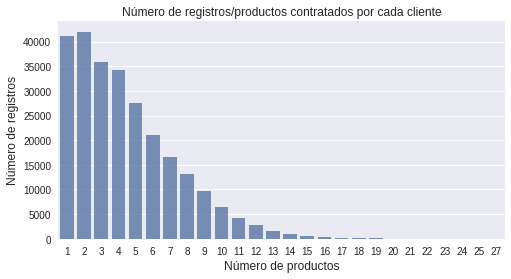

In [8]:
num_occur = train_df.groupby('ID_Customer').agg('size').value_counts()
plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.title(u'Número de registros/productos contratados por cada cliente', fontsize=12)
plt.xlabel(u'Número de productos', fontsize=12)
plt.ylabel(u'Número de registros', fontsize=12)
plt.show()

Añadimos 2 nuevas columnas en el dataset, para visualizar de forma más cómoda el mes y el año

In [9]:
train_df["Cod_Anio"], train_df["Cod_Mes"] = train_df["Cod_Fecha"].str.split('-').str

<h4>Histórico de productos vendidos por mes</h4>

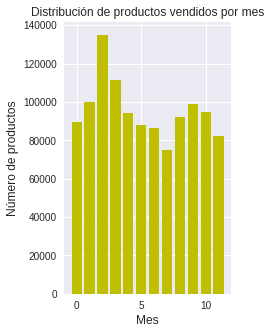

In [12]:
column = 'Cod_Mes'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Mes", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos vendidos por mes", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()

<h4>Ventas por año</h4>

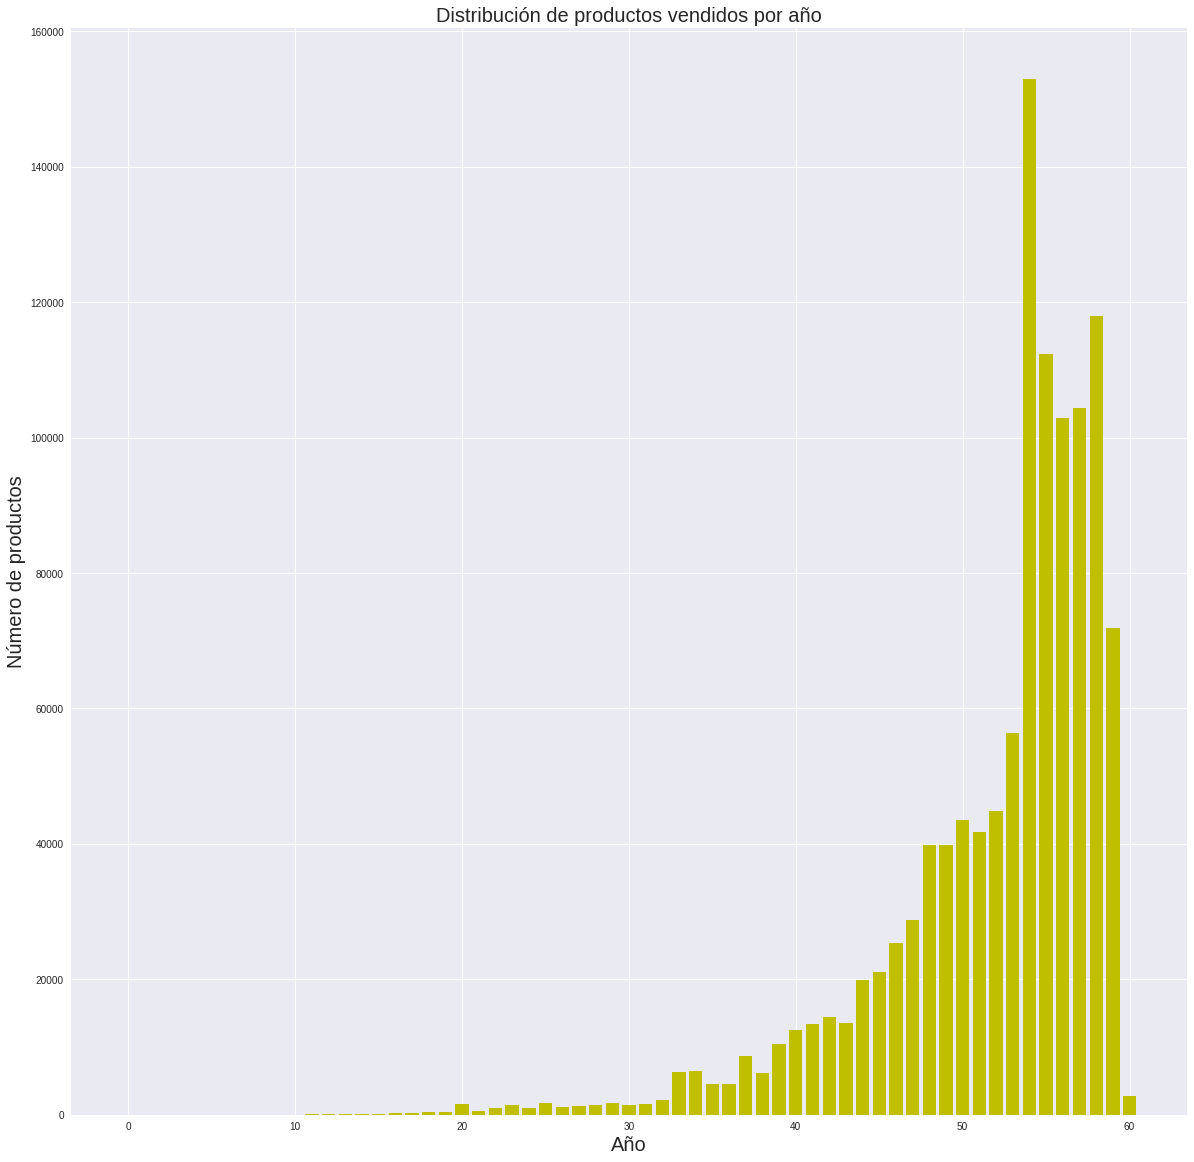

In [13]:
column = 'Cod_Anio'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
#ind = np.sort(labels)
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(20,20))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Año", fontsize=20)
ax.set_ylabel(u"Número de productos", fontsize=20)
ax.set_title(u"Distribución de productos vendidos por año", fontsize=20)
plt.show()

<h4>Cantidad de productos vendidos según edad</h4>

<p>1: Edad < 18 años</p>
<p>2: Edad >= 18 años y Edad < 30 años</p>
<p>3: Edad >= 30 años y Edad < 45 años</p>
<p>4: Edad >= 45 años y Edad < 65 años</p>
<p>5: Edad >= 65 años</p>

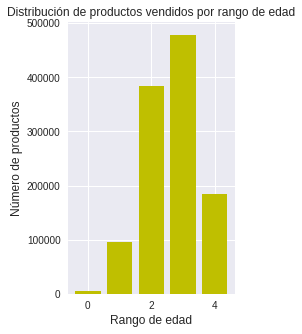

In [14]:
column = 'Socio_Demo_01'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Rango de edad", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos vendidos por rango de edad", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()

<h4>Cantidad de productos vendidos según antiguedad</h4>

<p>1: Antigüedad < 1 año</p>
<p>2: Antigüedad >=1 año y Antigüedad < 5 años</p>
<p>3: Antigüedad >= 5 años y Antigüedad < 10 años</p>
<p>4: Antigüedad >= 10 años y Antigüedad < 20 años</p>
<p>5: Antigüedad >= 20 años</p>

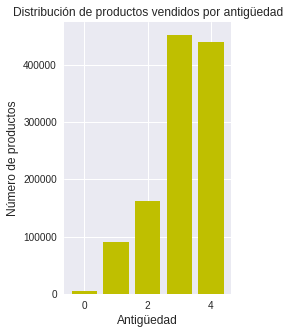

In [15]:
column = 'Socio_Demo_02'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Antigüedad", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos vendidos por antigüedad", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()

<h4>Cantidad de productos vendidos según ingresos</h4>

<p>1: Ingresos < 6.000 €</p>
<p>2: Ingresos >= 6.000 € and Ingresos < 12.000 €</p>
<p>3: Ingresos >= 12.000 € and Ingresos < 24.000 €</p>
<p>4: Ingresos >= 24.000 € and Ingresos < 32.000 €</p>
<p>5: Ingresos >= 32.000 €</p>

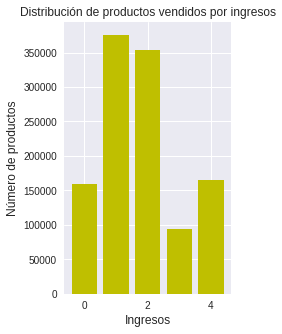

In [16]:
column = 'Socio_Demo_03'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Ingresos", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos vendidos por ingresos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()

<h4>Cantidad de productos vendidos según hombre/mujer</h4>

<p>1: Hombre</p>
<p>2: Mujer</p>

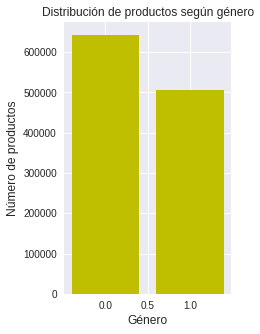

In [17]:
column = 'Socio_Demo_04'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y')
ax.set_xlabel(u"Género", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos según género", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()

<h4>Cantidad de productos vendidos según segmento</h4>

<p>00: Particular</p>
<p>01: Agricultor</p>
<p>02: Comercio</p>
<p>03: Autónomo</p>

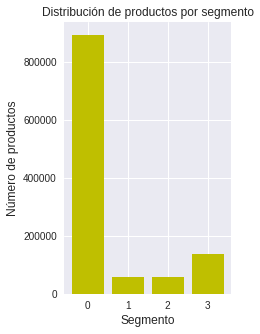

In [18]:
column = 'Socio_Demo_05'
labels = train_df[column].unique()
values = train_df.groupby(column).size()
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(3,5))
rects = ax.bar(ind, np.array(values), color='y') 
ax.set_xlabel(u"Segmento", fontsize=12)
ax.set_ylabel(u"Número de productos", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
ax.set_title(u"Distribución de productos por segmento", fontsize=12) # clientes cuando se haga la transformación de datos ('one hot encoding')
plt.show()